In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon 

In [56]:
class BuckleyLev():
    
    def __init__(self):
        self.params = {
            #non wetting phase viscosity
            "viscosity_o": 1.e-3,
            #wetting phase viscosity
            "viscosity_w": 1.e-3,
            #initial water sat
            "initial_sw":0,
            #residual water saturation,
            "residual_w":0,
            #residual oil saturation,
            "residual_o":0,
            #water rel perm at water curve end point
            "krwe":0.7,
            #oil rel perm at oil curve end point
            "kroe": 0.99
        }

In [57]:
def k_rw(self,sw):
    #water relative perm calculation for a given water saturation 
    p = 11.174
    return ((self.params['krwe']))*sw**p

BuckleyLev.k_rw = k_rw

In [58]:
def k_rn(self,sw):
    #oil relative perm calculation for a given water saturation 
    q = 3.326
    return ((1.-self.params['kroe']*sw)**q)

BuckleyLev.k_rn = k_rn

In [59]:
def fractional_flow(self,sw):
    #returns the fractional flow
    
    return 1./(1.+((self.k_rn(sw)/self.k_rw(sw))*(self.params["viscosity_w"]/self.params["viscosity_o"])))

BuckleyLev.fractional_flow = fractional_flow

In [60]:
def fractional_flow_deriv(self,sw):
    #calculate derivative of fractional flow - dFw/dSw - Vsh
    
    f_deriv = (self.fractional_flow(sw+0.001) - self.fractional_flow(sw))/0.001
    
    return f_deriv

BuckleyLev.fractional_flow_deriv = fractional_flow_deriv

In [61]:
def plot_fractional_flow(self):
    #plot the sw vs fractional flow
    
    x = np.linspace(self.params["residual_w"]+1e-3,(1-self.params["residual_o"]+1e-3),50)
    y = [self.fractional_flow(i) for i in x ]
    
    plt.plot(x,y)
    
    plt.show()
    
BuckleyLev.plot_fractional_flow = plot_fractional_flow

In [62]:
def plot_fractional_flow_deriv(self):
    #plot the derivative dFw/dSw - Vsh vs Sw
    y = np.linspace(self.params["residual_w"]+1e-3,(1-self.params["residual_o"]+1e-3),50)
    x = [self.fractional_flow_deriv(i) for i in y ]
    
    plt.plot(x,y)
    plt.show()
    
BuckleyLev.plot_fractional_flow_deriv=plot_fractional_flow_deriv

In [66]:
def fractional_flow_2deriv(self,sw):
    f_2deriv = ((self.fractional_flow(sw+0.01))-2*(self.fractional_flow(sw))-self.fractional_flow(sw-0.01))/((0.01)**2)
    return f_2deriv

BuckleyLev.fractional_flow_2deriv = fractional_flow_2deriv

In [70]:
def sw_at_shock_front(self):
    #first find range to search in by looking where 2nd derivative is negative (where curve turns)
    
    sw_start = 1.-self.params['residual_o']
    sw_end = self.params['residual_w']
    
    for sw in np.arrange(self.params['residual_w']+1.e-9, 1.-self.params['residual_o'],0.001):
        if (self.fractional_flow_2deriv(sw)< -1.e-2 and sw < sw_start):
            #i.e. we are below sw_start and the grad is negative - update upper limit
            sw_start = sw
        if (self.fractional_flow_2deriv(sw)< -1.e-2 and sw > sw_end):
            # i.e. we are above sw_end and the gradi is negative - update lower limit
            sw_end = sw
        else:
            sw_at_front = 0.
            current_min = 1000
            
            #find where finite difference approximation (almost) equals the continuous value of the function
            for sw in np.arrange(sw_start,sw_end, 0.001):
                current_diff = abs(self.fractional_flow_deriv(sw)-self.fractional_flow(sw)/sw)
                if current_diff <current_min:
                    current_min = current_diff
                    sw_at_front = sw
                    
    return sw_at_front

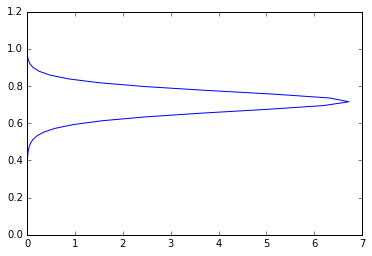

In [65]:
a.plot_fractional_flow_deriv()


4.689192265915693e-12

In [69]:
2-\
3

-1